## Spin Up a Sample Dataset

In [5]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create sample data
n_samples = 1000
data = {
    'price': np.random.normal(200000, 50000, n_samples).astype(int),
    'size': np.random.normal(1500, 500, n_samples).astype(int),
    'num_rooms': np.random.randint(2, 8, n_samples),
    'num_bathrooms': np.random.randint(1, 4, n_samples),
    'age': np.random.randint(0, 40, n_samples),
    'neighborhood': np.random.choice(['A', 'B', 'C', 'D', 'E'], n_samples),
    'income': np.random.normal(60000, 15000, n_samples).astype(int)
}

df = pd.DataFrame(data)

print(df.head())

    price  size  num_rooms  num_bathrooms  age neighborhood  income
0  224835  2199          7              2   15            E   78304
1  193086  1962          7              3   27            D   43849
2  232384  1529          4              1   15            A   48562
3  276151  1176          4              3    3            E   75544
4  188292  1849          4              3   25            A   51066


## 1. Understand the Data

    price  size  num_rooms  num_bathrooms  age neighborhood  income
0  224835  2199          7              2   15            E   78304
1  193086  1962          7              3   27            D   43849
2  232384  1529          4              1   15            A   48562
3  276151  1176          4              3    3            E   75544
4  188292  1849          4              3   25            A   51066
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          1000 non-null   int64 
 1   size           1000 non-null   int64 
 2   num_rooms      1000 non-null   int64 
 3   num_bathrooms  1000 non-null   int64 
 4   age            1000 non-null   int64 
 5   neighborhood   1000 non-null   object
 6   income         1000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 54.8+ KB
None
               price         size    num_roo

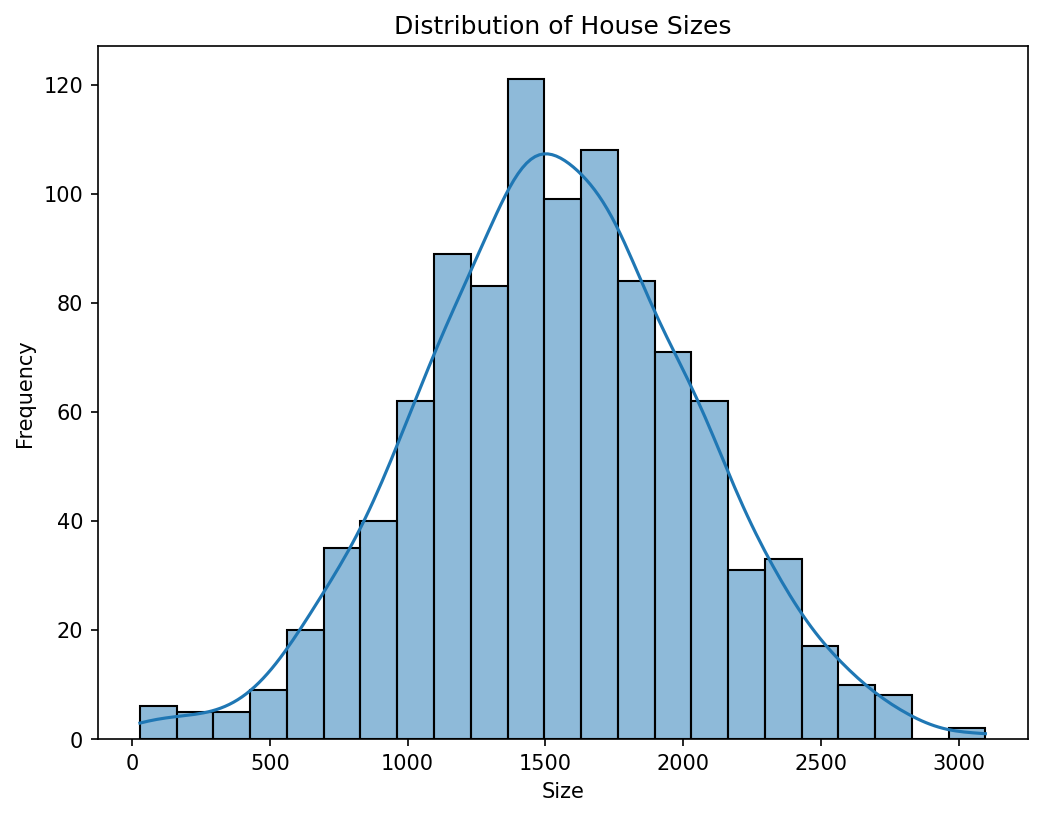

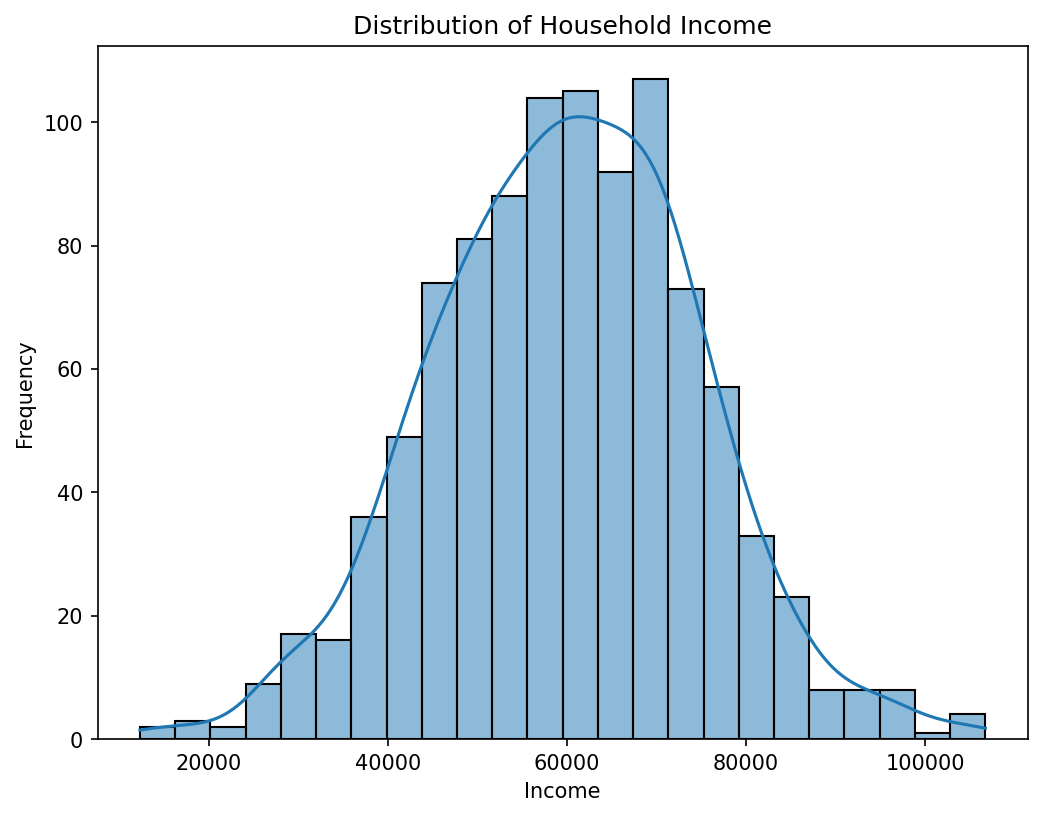

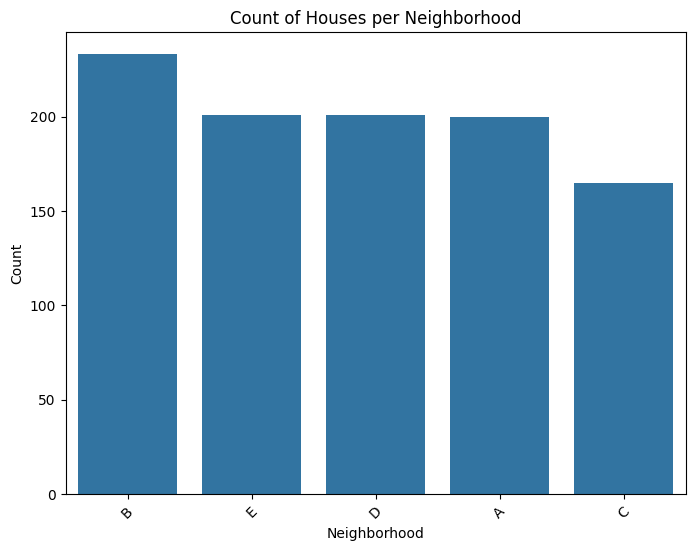

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic data exploration on the entire dataset
print(df.head())
print(df.info())
print(df.describe())

# Visualize distributions using distplot for 'size' and 'income'
plt.figure(figsize=(8, 6),dpi=150)
sns.histplot(df['size'], kde=True)
plt.title('Distribution of House Sizes')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6),dpi=150)
sns.histplot(df['income'], kde=True)
plt.title('Distribution of Household Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Visualize count plot for categorical feature 'neighborhood'
plt.figure(figsize=(8, 6))
sns.countplot(x='neighborhood', data=df, order=df['neighborhood'].value_counts().index)
plt.title('Count of Houses per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## 2. Preprocess the Data Effectively

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Split data into features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Handling missing values
imputer = SimpleImputer(strategy='median')
X_train['feature_to_impute'] = imputer.fit_transform(X_train[['feature_to_impute']])
X_test['feature_to_impute'] = imputer.transform(X_test[['features_to_impute']])

# Scaling features
scaler = StandardScaler()
X_train[['features_to_impute']] = scaler.fit_transform(X_train[['features_to_impute']])
X_test[['features_to_impute']] = scaler.transform(X_test[['features_to_impute']])

## 3. Create Interaction Terms

In [8]:
from sklearn.preprocessing import PolynomialFeatures

# Creating polynomial and interaction features on training set
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction_terms_train = poly.fit_transform(X_train[['size', 'num_rooms']])
interaction_terms_test = poly.transform(X_test[['size', 'num_rooms']])

interaction_df_train = pd.DataFrame(interaction_terms_train, columns=poly.get_feature_names_out(['size', 'num_rooms']))
interaction_df_test = pd.DataFrame(interaction_terms_test, columns=poly.get_feature_names_out(['size', 'num_rooms']))

# Merging the interaction terms with the original dataframes
X_train = pd.concat([X_train, interaction_df_train], axis=1)
X_test = pd.concat([X_test, interaction_df_test], axis=1)

## Create Indicator Variables

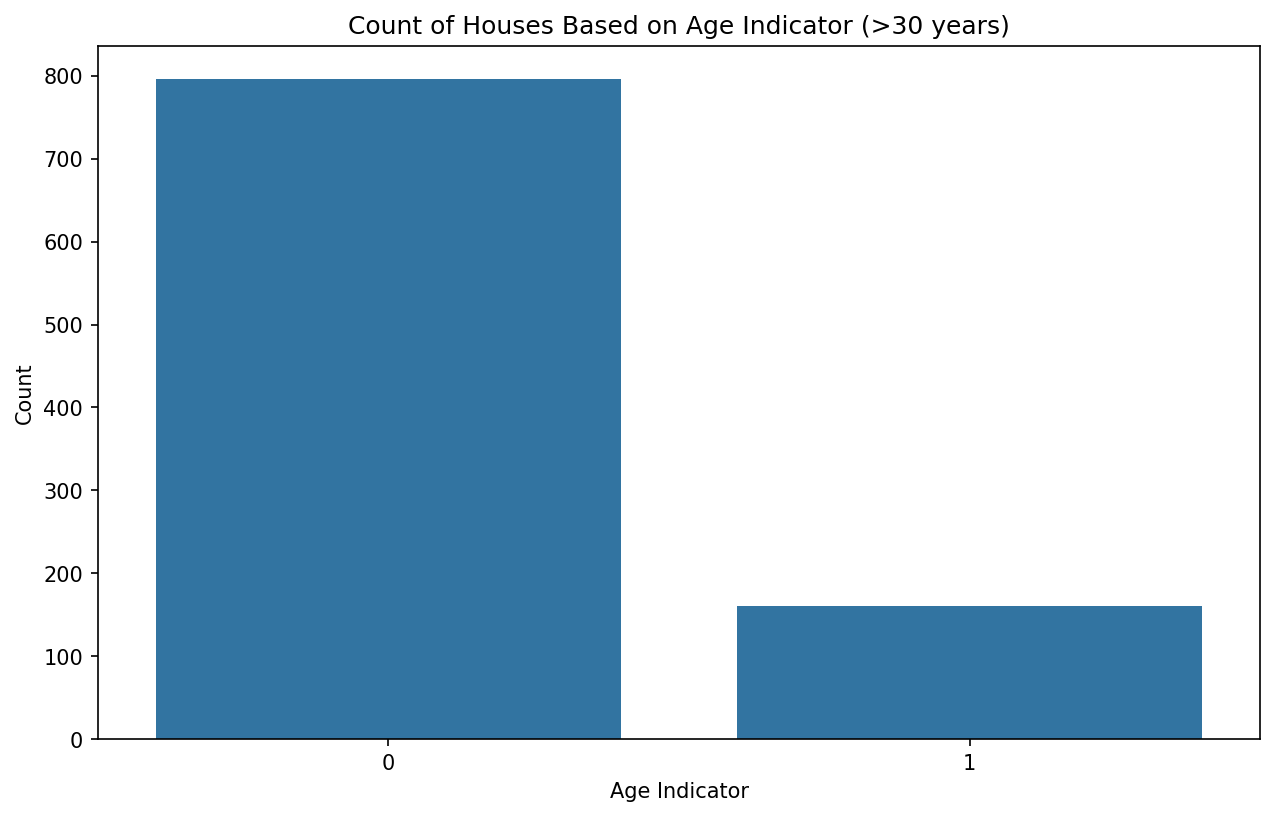

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Creating an indicator variable for houses older than 30 years
X_train['age_indicator'] = (X_train['age'] > 30).astype(int)
X_test['age_indicator'] = (X_test['age'] > 30).astype(int)

# Visualize the indicator variables
plt.figure(figsize=(10, 6),dpi=150)
sns.countplot(x='age_indicator', data=X_train)
plt.title('Count of Houses Based on Age Indicator (>30 years)')
plt.xlabel('Age Indicator')
plt.ylabel('Count')
plt.show()

## 5. Create More Representative Features with Binning

In [10]:
# Age bins
X_train['age_bin'] = pd.cut(X_train['age'], bins=3, labels=['new', 'moderate', 'old'])
X_test['age_bin'] = pd.cut(X_test['age'], bins=3, labels=['new', 'moderate', 'old'])

# Income bins
X_train['income_bin'] = pd.cut(X_train['income'], bins=4, labels=['low', 'medium', 'high', 'very_high'])
X_test['income_bin'] = pd.cut(X_test['income'], bins=4, labels=['low', 'medium', 'high', 'very_high'])